# Import Dependencies

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import AUC

pd.set_option('display.max_columns', None)

import pickle

# Data Acquisition

In [82]:
train = pd.read_csv(r"C:\Users\nene0\OneDrive\바탕 화면\Python Learning\DataScienceMod2_LFZ\LoanDefault\cleaned_final_train.csv")
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,

In [83]:
train.isna().sum().sum()

0

# Data Preparation

In [84]:
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
0,176327,Cash loans,M,N,N,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0
1,348984,Revolving loans,M,Y,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

In [85]:
train['TARGET'].value_counts()

TARGET
0    24824
1    24824
Name: count, dtype: int64

In [86]:
train.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
count,49648.000000,49648.000000,4.964800e+04,4.964800e+04,49648.000000,4.964800e+04,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,4.964800e+04,4.964800e+04,4.964800e+04,49648.000000,49648.000000,4.964800e+04,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.000000,49648.

## Binary Features

In [87]:
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].map(lambda x: 1 if x=='Y' else 0)
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].map(lambda x: 1 if x=='Y' else 0)

## Categorical Features

In [88]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
0,176327,Cash loans,M,0,0,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0
1,348984,Revolving loans,M,1,1,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,

In [89]:
train['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House                  22865
House / apartment      20512
With parents            2852
Municipal apartment     1881
Rented apartment         998
Office apartment         381
Co-op apartment          159
Name: count, dtype: int64

In [90]:
train['NAME_HOUSING_TYPE'] = train['NAME_HOUSING_TYPE'].map(lambda x: 'Apartment' if x=='House / apartment' else x)
train['HOUR_APPR_PROCESS_START'] = train['HOUR_APPR_PROCESS_START'].astype('object')

## Feature Engineering

In [91]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID
0,176327,Cash loans,M,0,0,2,180000.0,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,0,0,0,1,1,0,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0
1,348984,Revolving loans,M,1,1,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,

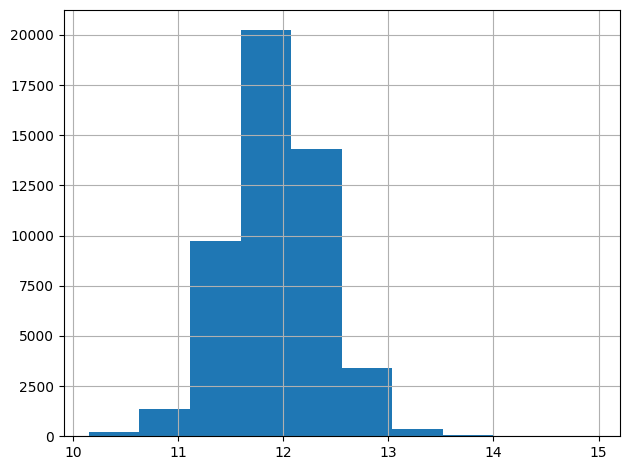

In [92]:
train['log_INCOME_TOTAL'].hist()
plt.tight_layout()
plt.show()

In [93]:
income_avg = train['log_INCOME_TOTAL'].mean()
income_std = train['log_INCOME_TOTAL'].std()

lower_limit = income_avg-(1*income_std)
upper_limit = income_avg+(1*income_std)
lower_limit2 = income_avg-(2*income_std)
upper_limit2 = income_avg+(2*income_std)

In [94]:
pickle.dump(lower_limit, open("lower_limit.pickle", "wb"))
pickle.dump(upper_limit, open("upper_limit.pickle", "wb"))
pickle.dump(lower_limit2, open("lower_limit2.pickle", "wb"))
pickle.dump(upper_limit2, open("upper_limit2.pickle", "wb"))

In [95]:
((train['log_INCOME_TOTAL']>=lower_limit)&(train['log_INCOME_TOTAL']<=upper_limit)).mean()

0.6748509506928778

In [96]:
((train['log_INCOME_TOTAL']>=lower_limit2)&(train['log_INCOME_TOTAL']<=upper_limit2)).mean()

0.9513776990009668

In [97]:
train['CRED_INCOME_RATIO'] = round(train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']*100, 4)
train['GOODS_ANNUITY_RATIO'] = round(train['AMT_GOODS_PRICE']/train['AMT_ANNUITY']*100, 4)
train['ANNUITY_INCOME_RATIO'] = round(train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']*100, 4)
train['CREDIT_USAGE'] = round(train['AMT_GOODS_PRICE']/train['AMT_CREDIT']*100, 4)

train['INCOME_LEVEL'] = train['log_INCOME_TOTAL'].map(lambda x: 'High' if x >= upper_limit2 else 'Above Avg' if x>= upper_limit else 'Below Avg' if x<=lower_limit else 'Low')

train['TENURE_AGE_RATIO'] = round((train['TENURE']/train['AGE']), 4)
train['OWN_CAR_RATIO'] = round((train['OWN_CAR_AGE']/train['AGE']), 4)

train['ADDRESS_REGION_FLAG'] = train['REG_REGION_NOT_LIVE_REGION'] + train['REG_REGION_NOT_WORK_REGION'] + train['LIVE_REGION_NOT_WORK_REGION']
train['ADDRESS_REGION_FLAG'] = train['ADDRESS_REGION_FLAG'].map(lambda x: 1 if x > 0 else x)
train['ADDRESS_CITY_FLAG'] = train['REG_CITY_NOT_LIVE_CITY'] + train['REG_CITY_NOT_WORK_CITY'] + train['LIVE_CITY_NOT_WORK_CITY']
train['ADDRESS_CITY_FLAG'] = train['ADDRESS_CITY_FLAG'].map(lambda x: 1 if x > 0 else x)

train['LEFT_INCOME'] = train['AMT_INCOME_TOTAL'] - train['AMT_ANNUITY']

train['MONTHLY_INCOME'] = train['AMT_INCOME_TOTAL']/12
train['MONTHLY_INSTALLMENT'] = train['AMT_ANNUITY']/12

train['DTI'] = train['MONTHLY_INSTALLMENT']/train['MONTHLY_INCOME']

train.drop(columns=['AMT_INCOME_TOTAL', 'REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY'], inplace=True)

I've derived 13 new features:

- `CRED_INCOME_RATIO`: Indicates the ratio between the credited amount and the client's income, showing the proportion of credit in relation to income.
- `GOODS_ANNUITY_RATIO`: Represents the relationship between the goods price and the annuity.
- `ANNUITY_INCOME_RATIO`: Shows the ratio between the annuity and the client's total income.
- `CREDIT_USAGE`: Reflects the extent of a client's credit usage.
- `INCOME_LEVEL`: This categorical feature categorizes income levels based on standard deviations from the mean. 'High' denotes incomes 2 standard deviations above the mean, 'Above Avg' for incomes above 1 standard deviation, 'Below Avg' for those below 1 standard deviation, and the rest are labeled 'Low'.
- `TENURE_AGE_RATIO`: Highlights the ratio between tenure and age, providing insight into how tenure compares to age.
- `OWN_CAR_RATIO`: Indicates the duration of car ownership relative to the client's age.
- `ADDRESS_REGION_FLAG`: Represents a flag for discrepancies in address details at the region level.
- `ADDRESS_CITY_FLAG`: Similar to the previous feature but at the city level.
- `MONTHLY_INCOME`: Denotes the client's monthly income.
- `MONTHLY_INSTALLMENT`: Indicates the client's monthly installment.
- `DTI` (Debt-to-Income Ratio): Shows the ratio of a client's debt to their income.

In [98]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID,CRED_INCOME_RATIO,GOODS_ANNUITY_RATIO,ANNUITY_INCOME_RATIO,CREDIT_USAGE,INCOME_LEVEL,TENURE_AGE_RATIO,OWN_CAR_RATIO,ADDRESS_REGION_FLAG,ADDRESS_CITY_FLAG,LEFT_INCOME,MONTHLY_INCOME,MONTHLY_INSTALLMENT,DTI
0,176327,Cash loans,M,0,0,2,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0,166.9700,741.6719,19.8875,88.3392,Low,0.3423,0.0000,0,1,144202.5,15000.0,2983.125,0.198875
1,348984,Revolving loans,M,1,1,0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

In [99]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49648 entries, 0 to 49647
Data columns (total 158 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    49648 non-null  int64  
 1    NAME_CONTRACT_TYPE            49648 non-null  object 
 2    CODE_GENDER                   49648 non-null  object 
 3    FLAG_OWN_CAR                  49648 non-null  int64  
 4    FLAG_OWN_REALTY               49648 non-null  int64  
 5    CNT_CHILDREN                  49648 non-null  int64  
 6    AMT_CREDIT                    49648 non-null  float64
 7    AMT_ANNUITY                   49648 non-null  float64
 8    AMT_GOODS_PRICE               49648 non-null  float64
 9    NAME_TYPE_SUITE               49648 non-null  object 
 10   NAME_INCOME_TYPE              49648 non-null  object 
 11   NAME_EDUCATION_TYPE           49648 non-null  object 
 12   NAME_FAMILY_STATUS            49648 non-null

## Scale Data

In [100]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,LAST_STATUS,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID,CRED_INCOME_RATIO,GOODS_ANNUITY_RATIO,ANNUITY_INCOME_RATIO,CREDIT_USAGE,INCOME_LEVEL,TENURE_AGE_RATIO,OWN_CAR_RATIO,ADDRESS_REGION_FLAG,ADDRESS_CITY_FLAG,LEFT_INCOME,MONTHLY_INCOME,MONTHLY_INSTALLMENT,DTI
0,176327,Cash loans,M,0,0,2,300546.0,35797.5,265500.0,Family,Working,Secondary / secondary special,Married,House,0.007305,9.838356,14.019178,0.0,1,0,0,Drivers,4.0,3,3,FRIDAY,15,Business Entity Type 3,0.481908,0.480015,0.579727,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,XNA,house,0.0000,XNA,XNA,3.0,0.0,3.0,0.0,8.306849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,3.0,0,40.509589,13.865753,12.100712,-31.0,0,32.0,-966.0,-966.0,-38.0,0.00,0.0,32494.50,-3.0,-96.0,180000.0,0.0,0.00,0.00,0.000,0.000,0.0,9000.0,87.0,2902.0,40.0,2930.0,423.855,423.8550,28.0,0.0000,5.0,-31.0,-35.0,9.0,7.0,2.0,166.9700,741.6719,19.8875,88.3392,Low,0.3423,0.0000,0,1,144202.5,15000.0,2983.125,0.198875
1,348984,Revolving loans,M,1,1,0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House,0.019101,23.391781,3.161644,14.0,1,0,0,Drivers,2.0,2,2,WEDNESDAY,13,Transport: type 3,0.544910,0.697443,0.503560,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

In [101]:
numeric_features = train[train.drop(columns=['SK_ID_CURR', 'TARGET']).select_dtypes(exclude='object').columns]

numeric_features.shape

(49648, 139)

In [102]:
scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

In [103]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

In [104]:
train_scaled.shape

(49648, 139)

In [105]:
train_scaled

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID,CRED_INCOME_RATIO,GOODS_ANNUITY_RATIO,ANNUITY_INCOME_RATIO,CREDIT_USAGE,TENURE_AGE_RATIO,OWN_CAR_RATIO,ADDRESS_REGION_FLAG,ADDRESS_CITY_FLAG,LEFT_INCOME,MONTHLY_INCOME,MONTHLY_INSTALLMENT,DTI
0,0.0,0.0,0.181818,0.064164,0.150898,0.062025,0.097136,0.156621,0.801661,0.000000,1.0,0.0,0.0,0.250000,1.0,1.0,0.503472,0.561418,0.646802,0.50000,0.50000,0.50000,0.5000,0.50000,0.50,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.5000,0.5000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.5000,0.50000,0.129032,0.142857,0.133333,0.166667,0.735744,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.285714,0.142857,0.052632,0.05,0.173913,0.405847,0.300606,0.405024,0.670103,0.075472,0.669405,0.669405,0.998569,0.003537,0.0,0.001444,0.4,0.000000,0.133333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047625,0.262048,0.993155,0.363636,0.940610,0.000432,0.000432,0.739830,0.857736,0.021552,0.677083,0.635417,0.136364,0.116667,0.060606,0.017890,0.006488,0.101221,0.124929,0.476608,0.000000,0.0,1.0,0.053358,0.049402,0.150898,0.101221
1,1.0,1.0,0.000000,0.056495,0.050831,0.063291,0.260475,0.372383,0.180793,0.153846,1.0,0.0,0.0,0.083333,0.5,0.5,0.571363,0.815722,0.561745,0.50000,0.50000,0.50000,0.5000,0.50000,0.50,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.5000,0.5000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.5000,0.50000,0.032258,0.142857,0.033333,0.166667,0.052414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Encode Data

In [106]:
encode_list = train.select_dtypes('object').columns

In [107]:
pickle.dump(encode_list, open("encode_list.pickle", "wb"))

In [108]:
cat_features = train[encode_list]

In [109]:
cat_features

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,LAST_STATUS,INCOME_LEVEL
0,Cash loans,M,Family,Working,Secondary / secondary special,Married,House,Drivers,FRIDAY,15,Business Entity Type 3,XNA,house,XNA,XNA,0,Low
1,Revolving loans,M,Unaccompanied,Working,Secondary / secondary special,Married,House,Drivers,WEDNESDAY,13,Transport: type 3,XNA,house,XNA,XNA,Unknown,Low
2,Cash loans,M,Unaccompanied,Working,Higher education,Married,Apartment,Managers,THURSDAY,11,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Unknown,Low
3,Cash loans,F,Family,State servant,Secondary / secondary special,Married,House,Laborers,MONDAY,18,Telecom,XNA,house,XNA,XNA,Unknown,Low
4,Cash loans,M,Family,Working,Secondary / secondary special,Married,House,Laborers,MONDAY,16,Other,XNA,house,XNA,XNA,Unknown,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49643,Cash loans,F,Unaccompanied,Pensioner,Secondary / secondary special,Widow,Apartment,XNA,TUESDAY,8,XNA,reg oper account,block of flats,"Stone, brick",No,Unknown,Low
49644,Cash loans,F,Unaccompanied,Working,Secondary / secondary special,Single / not married,Apartment,Laborers,MONDAY,8,Business Entity Type 2,reg oper account,block of flats,Panel,No,Unknown,Low
49645,Cash loans,F,Unaccompanied,Working,Incomplete higher,Civil marriage,Rented apartment,Laborers,THURSDAY,12,Business Entity Type 3,not specified,block of flats,"Stone, brick",No,Unknown,Low
49646,Cash loans,F,Family,Working,Secondary / secondary special,Married,House,Cooking staff,SATURDAY,15,School,XNA,house,XNA,XNA,0,Below Avg


In [110]:
onehot = ce.OneHotEncoder(use_cat_names=True)
train_encoded = onehot.fit_transform(cat_features)

In [111]:
pickle.dump(onehot, open("onehot.pickle", "wb"))

In [112]:
train_encoded.shape

(49648, 176)

## Join Dataframe

In [113]:
train_final = train_scaled.join(train_encoded)

In [114]:
train_final.shape

(49648, 315)

In [115]:
train_final.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID,CRED_INCOME_RATIO,GOODS_ANNUITY_RATIO,ANNUITY_INCOME_RATIO,CREDIT_USAGE,TENURE_AGE_RATIO,OWN_CAR_RATIO,ADDRESS_REGION_FLAG,ADDRESS_CITY_FLAG,LEFT_INCOME,MONTHLY_INCOME,MONTHLY_INSTALLMENT,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unknown,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Maternity leave,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_House,NAME_HOUSING_TYPE_Apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Office apartment,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_XNA,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Private service staff,O

In [116]:
train_final.describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,TENURE,log_INCOME_TOTAL,BALANCE_FRESH,CREDIT_COUNT,APPLY_CRED_MAX,APPLY_CRED_MIN,CRED_UPDATE,CRED_DEBT_MED,OVERDUE_CRED_SUM,CRED_SUM_MED,CRED_FRESH,CRED_OLD,MED_CRED_LIMIT,MED_CURRENT_DRAW,MED_AMOUNT_PAID,MED_AMOUNT_RECIEVE,MED_AMOUNT_RECIEVED,MED_TOTAL_RECIEVEABLE,MAX_DRAWINGS,MED_MINMAX_INST,COUNT_INSTALL,INST_PAY_RECENT,MED_PAID_INSTALL,INST_PAID,MED_INSTALL_AMT,MED_INSTALL_AMT_PAID,DIFF_INST_PAID_DAYS,DIFF_INST_PAID_AMT,NUM_CASH_LOAN,FRESH_CASH_BAL,OLD_CASH_BAL,AVG_CASH_INST,AVG_CASH_INST_LEFT,AVG_CASH_INST_PAID,CRED_INCOME_RATIO,GOODS_ANNUITY_RATIO,ANNUITY_INCOME_RATIO,CREDIT_USAGE,TENURE_AGE_RATIO,OWN_CAR_RATIO,ADDRESS_REGION_FLAG,ADDRESS_CITY_FLAG,LEFT_INCOME,MONTHLY_INCOME,MONTHLY_INSTALLMENT,DTI,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_F,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Unaccompanied,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unknown,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Maternity leave,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_House,NAME_HOUSING_TYPE_Apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_Office apartment,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_XNA,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Private service staff,O

# Train Model

In [117]:
x = train_final
y = train['TARGET']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39718, 315), (9930, 315), (39718,), (9930,))

## Classification Model

In [157]:
rfc = RandomForestClassifier(random_state=0, n_estimators=5000, max_depth=20, n_jobs=-1)
xgb = XGBClassifier(random_state=0, eta=0.2)
logi = LogisticRegression(max_iter=1000)

In [158]:
rfc_model = rfc.fit(X=x_train, y=y_train)
rfc_pred = rfc_model.predict(x_test)

xgb_model = xgb.fit(X=x_train, y=y_train)
xgb_pred = xgb_model.predict(x_test)

logi_model = logi.fit(X=x_train, y=y_train)
logi_pred = logi_model.predict(x_test)

In [135]:
rfc_pred_prob = rfc_model.predict_proba(x_test)
xgb_pred_prob = xgb_model.predict_proba(x_test)
logi_pred_prob = logi_model.predict_proba(x_test)

In [142]:
weighted_pred_test = rfc_pred_prob * 0.3 + xgb_pred_prob * 0.3 + logi_pred_prob * 0.4
weighted_pred_test

array([[0.2070103 , 0.79298973],
       [0.63720518, 0.36279483],
       [0.59715544, 0.40284457],
       ...,
       [0.71213305, 0.28786697],
       [0.61605112, 0.38394889],
       [0.45599713, 0.54400288]])

In [144]:
# pickle.dump(rfc_model, open("rfc_model.pickle", "wb"))
# pickle.dump(xgb_model, open("xgb_model.pickle", "wb"))
# pickle.dump(logi_model, open("logi_model.pickle", "wb"))

In [159]:
score_data = {
    'Model': ['Logistic', 'RandomForest', 'XGBoost'],
    'Precision': [precision_score(y_test, logi_pred), precision_score(y_test, rfc_pred), precision_score(y_test, logi_pred)],
    'Recall': [recall_score(y_test, logi_pred), recall_score(y_test, rfc_pred), recall_score(y_test, logi_pred)],
    'ROC_AUC':[roc_auc_score(y_test, logi_pred), roc_auc_score(y_test, rfc_pred), roc_auc_score(y_test, logi_pred)]
}

score_df = pd.DataFrame(score_data)
score_df

,Model,Precision,Recall,ROC_AUC
0,Logistic,0.697972,0.694730,0.697777
1,RandomForest,0.692766,0.680598,0.690108
2,XGBoost,0.697972,0.694730,0.697777


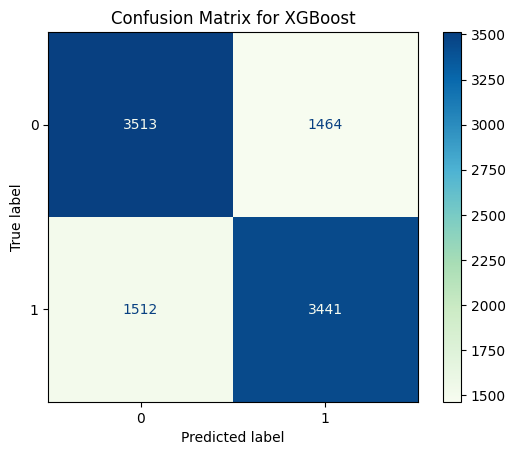

In [160]:
xgb_cm = confusion_matrix(y_test, xgb_pred, labels=xgb.classes_)

rfc_display = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb.classes_)

rfc_display.plot(values_format='', cmap='GnBu')

plt.title("Confusion Matrix for XGBoost")
plt.show()

# Neural Networks

In [119]:
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=315, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [120]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                20224     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 24449 (95.50 KB)
Trainable params: 24449 (95.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
opt = Adam(learning_rate=0.0001)
callback = EarlyStopping(monitor='val_loss', patience=10)

ann_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[AUC()])

In [122]:
ann_result = ann_model.fit(x_train, y_train, batch_size=1000, epochs=100, validation_split=0.2, callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6902 - auc: 0.5635 - val_loss: 0.6870 - val_auc: 0.5971
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6833 - auc: 0.6160 - val_loss: 0.6785 - val_auc: 0.6341
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6732 - auc: 0.6411 - val_loss: 0.6676 - val_auc: 0.6505
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6620 - auc: 0.6583 - val_loss: 0.6580 - val_auc: 0.6623
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6520 - auc: 0.6731 - val_loss: 0.6497 - val_auc: 0.6741
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6436 - auc: 0.6847 - val_loss: 0.6429 - val_auc: 0.6848
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6367 - auc: 0.6938 - val_loss: 0.6369 - val_auc: 0.6929
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6302 - a

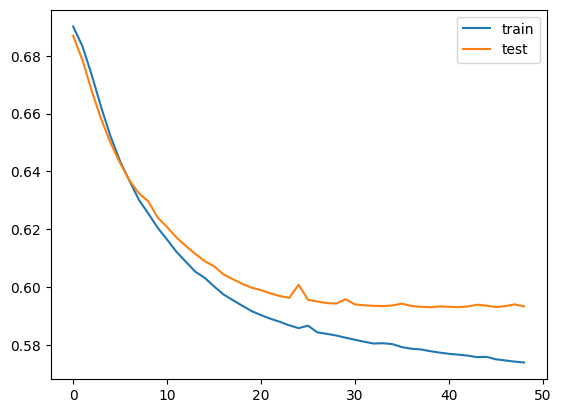

In [123]:
plt.plot(ann_result.history['loss'])
plt.plot(ann_result.history['val_loss'])
plt.legend(['train','test'])

In [162]:
ann_pred = ann_model.predict(x_test)
roc_auc_score(y_test, ann_pred)

311/311 [==============================] - 0s 605us/step


0.7574572084688699

In [163]:
ann_pred

array([[0.69096965],
       [0.27013355],
       [0.3894983 ],
       ...,
       [0.10563843],
       [0.36030164],
       [0.5870952 ]], dtype=float32)

In [174]:
pred_bin = np.where(ann_pred < 0.5, 0, 1)
pred_bin

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [175]:
confusion_matrix(y_test, pred_bin)

array([[3429, 1548],
       [1511, 3442]], dtype=int64)

In [167]:
ann_model.save("neural_model.keras")

# Wrap-Up

In this notebook, I've trained several models including Logistic Regression, Random Forest, XGBoost, and Artificial Neural Networks (ANN). While the models' precision, recall, and area under the curve (AUC) scores are around 69, indicating moderate performance, there's room for further improvement.

Interestingly, the ANN model demonstrates a more promising AUC score, reaching approximately 0.75, outperforming the other algorithms in terms of predictive power.

Now, the next step is to leverage these trained models and apply them to the test dataset for predictions. This process will allow us to evaluate the models' performance on unseen data, helping us determine their effectiveness in making accurate predictions for new observations.